# Consider ‘CitiBank’ data set

**Problem statement:**
Predict defaulters based on various parameters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats
from sklearn import metrics

%matplotlib inline

In [2]:
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
from sklearn import model_selection, preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

In [4]:
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
data1 = pd.read_csv('train_1.csv')
data2 = pd.read_csv('train_2.csv')
data3 = pd.read_csv('train_3.csv')

In [7]:
data4 = pd.merge(data1,data2)
data = pd.merge(data4,data3)

In [8]:
data.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,320000,2,1,2,27,1,2,1,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,1288,470000,1,2,1,41,-2,-2,0,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,11822,20000,1,2,2,25,1,2,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,15085,80000,1,3,1,41,0,0,1,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,6192,30000,1,1,2,30,1,-2,1,-2,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = data.drop(labels = 'Ref.No',axis = 1)

In [10]:
data.columns = ['given_cred','gender','edu','marital_stat','age','sep','aug','behaviour','july','june','may','april','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

In [11]:
data.head()

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,1,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,0,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.shape

(21600, 24)

# So, the taraget variable is the behaviour variable which tells if defaulter the value is 1 and if not the value is 0

In [13]:
data.isnull().any()

given_cred      False
gender          False
edu             False
marital_stat    False
age             False
sep             False
aug             False
behaviour       False
july            False
june            False
may             False
april           False
X12             False
X13             False
X14             False
X15             False
X16             False
X17             False
X18             False
X19             False
X20             False
X21             False
X22             False
X23             False
dtype: bool

In [14]:
data[['given_cred','age','X12','X13','X14','X15']].describe().T

,count,mean,std,min,25%,50%,75%,max
given_cred,21600.0,165235.818519,129013.755215,10000.0,50000.00,140000.0,230000.00,1000000.0
age,21600.0,35.382361,9.266769,21.0,28.00,34.0,41.00,79.0
X12,21600.0,50382.807546,72570.827360,-165580.0,3633.75,22182.0,65073.25,964511.0
X13,21600.0,48332.562407,70167.264656,-69777.0,3102.00,21095.5,61886.75,983931.0
X14,21600.0,46078.883009,68120.766812,-157264.0,2778.00,19978.0,58792.75,1664089.0
X15,21600.0,42103.725417,62928.222402,-170000.0,2311.50,18893.0,51549.00,891586.0


## Age and given_cred are skewed(towards right). But, the bills for sep,aug,july and june are very highly right skewed.

In [15]:
data.groupby('behaviour').count()

,given_cred,gender,edu,marital_stat,age,sep,aug,july,june,may,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
behaviour,,,,,,,,,,,,,,,,,,,,,
0,16766,16766,16766,16766,16766,16766,16766,16766,16766,16766,...,16766,16766,16766,16766,16766,16766,16766,16766,16766,16766
1,4834,4834,4834,4834,4834,4834,4834,4834,4834,4834,...,4834,4834,4834,4834,4834,4834,4834,4834,4834,4834


# Here, we can see that a large proportion(77%) are non-defaulters and have a good profile with the bank

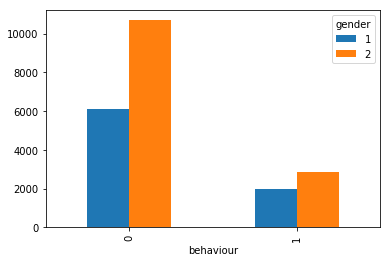

In [16]:
pd.crosstab(data.behaviour, data.gender).plot(kind='bar');

In [17]:
pd.crosstab(data.behaviour, data.gender,normalize = 'index')

gender,1,2
behaviour,,
0,0.362997,0.637003
1,0.407737,0.592263


We have more female than male with a bad behaviour(defaulters) and also, within the non-defaulters, we have a same case wherein there are more females. So, on a complete scale, we can say that, there are more female records than male and the proportion of the defaulters are more in female.

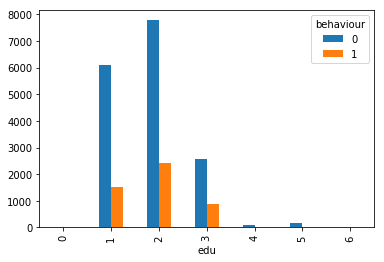

In [18]:
pd.crosstab(data.edu, data.behaviour).plot(kind='bar');

1. Graduate school
2. University 
3. High school
0,4,5,6. Others
# So, the citibank has more clients who study in the universities and also, defaulters are more from the universities followed by the colleges.


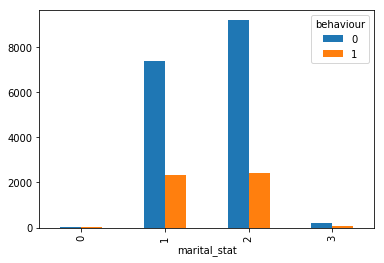

In [19]:
pd.crosstab(data.marital_stat, data.behaviour).plot(kind='bar');

There are many clients who are not married(2). Even though the married to singles ratio is less than 1, we can see that there are equal number of defaulters in both of these categories are same.

In [20]:
def draw_hist(data, X, title):
    sns.distplot(data[X]).set_title(title)
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


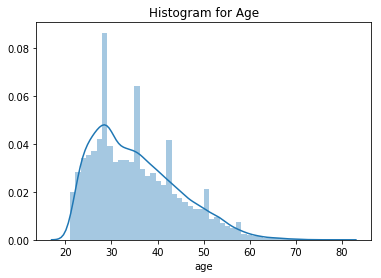

In [21]:
draw_hist(data, 'age', 'Histogram for Age')

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


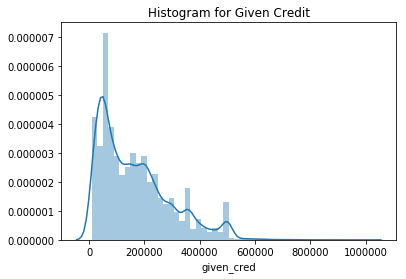

In [22]:
draw_hist(data, 'given_cred', 'Histogram for Given Credit')

Age and given_cred are skewed(towards right)

In [23]:
data['behaviour'].value_counts()

0    16766
1     4834
Name: behaviour, dtype: int64

Target variable with two classes are almost distributed with 77.62% for class 0 and 22.38% for class 1.

In [25]:
data.corr()

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
given_cred,1.000000,0.034904,-0.227472,-0.105628,0.149632,-0.266460,-0.294104,-0.150885,-0.286128,-0.263034,...,0.286805,0.296746,0.297493,0.291596,0.207132,0.193441,0.217309,0.207475,0.220694,0.229917
gender,0.034904,1.000000,0.016744,-0.036408,-0.098736,-0.061844,-0.071631,-0.038559,-0.071199,-0.059212,...,-0.019749,-0.013164,-0.011418,-0.011081,-0.002257,-0.005984,-0.004601,0.004499,0.003104,-0.004279
edu,-0.227472,0.016744,1.000000,-0.139503,0.166523,0.108855,0.126305,0.023008,0.116478,0.112588,...,0.013186,-0.002114,-0.009411,-0.009444,-0.036799,-0.030797,-0.041336,-0.042803,-0.041086,-0.038792
marital_stat,-0.105628,-0.036408,-0.139503,1.000000,-0.412459,0.013404,0.020276,-0.031020,0.028201,0.027403,...,-0.031129,-0.028932,-0.027603,-0.023855,-0.019895,-0.018156,-0.013458,-0.016050,-0.000563,-0.004994
age,0.149632,-0.098736,0.166523,-0.412459,1.000000,-0.037337,-0.053494,0.008051,-0.056584,-0.050888,...,0.058504,0.056399,0.053332,0.054165,0.031452,0.027231,0.037718,0.024486,0.030653,0.021432
sep,-0.266460,-0.061844,0.108855,0.013404,-0.037337,1.000000,0.669413,0.319002,0.571103,0.534592,...,0.173663,0.174485,0.176059,0.171590,-0.088647,-0.078318,-0.073255,-0.066299,-0.059590,-0.062785
aug,-0.294104,-0.071631,0.126305,0.020276,-0.053494,0.669413,1.000000,0.258833,0.767796,0.663134,...,0.219842,0.220149,0.218614,0.215836,-0.085568,-0.067428,-0.054968,-0.048545,-0.039588,-0.039281
behaviour,-0.150885,-0.038559,0.023008,-0.031020,0.008051,0.319002,0.258833,1.000000,0.233879,0.214572,...,-0.015157,-0.009584,-0.006726,-0.006736,-0.076351,-0.059177,-0.057392,-0.058405,-0.057441,-0.057295
july,-0.286128,-0.071199,0.116478,0.028201,-0.056584,0.571103,0.767796,0.233879,1.000000,0.780360,...,0.222667,0.223395,0.220721,0.218737,0.000227,-0.070347,-0.054639,-0.049217,-0.036868,-0.041645
june,-0.263034,-0.059212,0.112588,0.027403,-0.050888,0.534592,0.663134,0.214572,0.780360,1.000000,...,0.243136,0.246311,0.242005,0.238094,-0.009355,0.001949,-0.066428,-0.044992,-0.034586,-0.030017


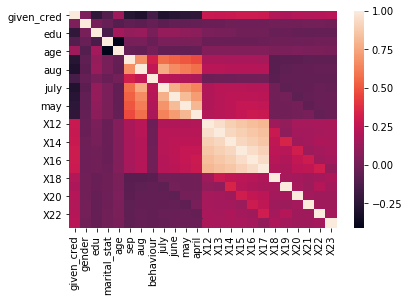

In [26]:
corr = data.corr()
#print(corr)
sns.heatmap(corr)

# Classification

# **1. Decision Tree**

In [27]:
data.head()

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,1,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,0,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [31]:
response = data[['behaviour']]
#response.head

**Scaling the Data**

In [29]:
data_z = data.apply(zscore)
data_z

,given_cred,gender,edu,marital_stat,age,sep,aug,behaviour,july,june,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1.199622,0.771310,-1.082964,0.845402,-0.904582,0.890581,1.767277,1.862350,1.791855,1.899712,...,-0.069127,-0.022403,-0.002437,0.007249,-0.233854,-0.204441,-0.181426,-0.214096,-0.212969,-0.295981
1,2.362316,-1.296495,0.197247,-1.070322,0.606227,-1.773392,-1.560885,-0.536956,-1.530739,-1.532139,...,-0.199883,-0.341392,-0.432164,-0.507905,0.455076,1.288822,-0.301621,-0.308090,0.232078,2.310904
2,-1.125765,-1.296495,0.197247,0.845402,-1.120412,0.890581,1.767277,-0.536956,0.130558,0.183787,...,-0.398682,-0.362433,-0.345621,-0.348151,-0.283083,-0.216524,-0.265489,-0.266606,-0.245531,-0.238918
3,-0.660688,-1.296495,1.477459,-1.070322,0.606227,0.002590,0.103196,1.862350,0.130558,0.183787,...,0.208930,0.323666,-0.310025,-0.612933,-0.166433,-0.132233,0.001985,0.343829,-0.173961,-0.295981
4,-1.048252,-1.296495,-1.082964,0.845402,-0.580837,0.890581,-1.560885,1.862350,-1.530739,-1.532139,...,-0.676445,-0.669091,-0.659698,-0.648519,-0.367627,-0.276649,-0.303700,-0.312553,-0.310653,-0.295981
5,1.199622,0.771310,0.197247,-1.070322,0.390397,0.002590,0.103196,-0.536956,0.130558,0.183787,...,1.258634,1.249981,1.337924,1.401127,-0.032593,0.018201,-0.059091,-0.049147,0.014960,-0.066872
6,-0.893226,0.771310,1.477459,-1.070322,0.174567,1.778572,0.103196,1.862350,0.130558,0.183787,...,-0.084072,-0.014632,0.040959,0.079386,-0.233854,-0.194813,-0.211994,-0.200968,-0.208541,0.126288
7,1.509674,-1.296495,-1.082964,0.845402,-0.149177,0.890581,-1.560885,-0.536956,-1.530739,-1.532139,...,-0.676445,-0.669091,-0.659698,-0.645976,-0.367627,-0.276649,-0.303700,-0.312553,-0.300885,-0.292614
8,-0.893226,0.771310,-1.082964,-1.070322,-1.120412,0.002590,0.103196,-0.536956,0.130558,0.183787,...,-0.485486,-0.469812,-0.481368,-0.504718,-0.267298,-0.207666,-0.214134,-0.312553,-0.278092,-0.238918
9,-1.048252,0.771310,0.197247,-1.070322,1.037887,1.778572,0.103196,-0.536956,0.130558,0.183787,...,-0.217881,-0.454381,-0.431003,-0.409981,-0.256261,-0.195969,-0.228929,-0.280194,-0.277376,-0.266651


In [29]:
data_z = data_z.drop(labels = 'behaviour', axis = 1)

In [30]:
data_z

,given_cred,gender,edu,marital_stat,age,sep,aug,july,june,may,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1.199622,0.771310,-1.082964,0.845402,-0.904582,0.890581,1.767277,1.791855,1.899712,1.981181,...,-0.069127,-0.022403,-0.002437,0.007249,-0.233854,-0.204441,-0.181426,-0.214096,-0.212969,-0.295981
1,2.362316,-1.296495,0.197247,-1.070322,0.606227,-1.773392,-1.560885,-1.530739,-1.532139,-1.534625,...,-0.199883,-0.341392,-0.432164,-0.507905,0.455076,1.288822,-0.301621,-0.308090,0.232078,2.310904
2,-1.125765,-1.296495,0.197247,0.845402,-1.120412,0.890581,1.767277,0.130558,0.183787,0.223278,...,-0.398682,-0.362433,-0.345621,-0.348151,-0.283083,-0.216524,-0.265489,-0.266606,-0.245531,-0.238918
3,-0.660688,-1.296495,1.477459,-1.070322,0.606227,0.002590,0.103196,0.130558,0.183787,0.223278,...,0.208930,0.323666,-0.310025,-0.612933,-0.166433,-0.132233,0.001985,0.343829,-0.173961,-0.295981
4,-1.048252,-1.296495,-1.082964,0.845402,-0.580837,0.890581,-1.560885,-1.530739,-1.532139,-1.534625,...,-0.676445,-0.669091,-0.659698,-0.648519,-0.367627,-0.276649,-0.303700,-0.312553,-0.310653,-0.295981
5,1.199622,0.771310,0.197247,-1.070322,0.390397,0.002590,0.103196,0.130558,0.183787,0.223278,...,1.258634,1.249981,1.337924,1.401127,-0.032593,0.018201,-0.059091,-0.049147,0.014960,-0.066872
6,-0.893226,0.771310,1.477459,-1.070322,0.174567,1.778572,0.103196,0.130558,0.183787,0.223278,...,-0.084072,-0.014632,0.040959,0.079386,-0.233854,-0.194813,-0.211994,-0.200968,-0.208541,0.126288
7,1.509674,-1.296495,-1.082964,0.845402,-0.149177,0.890581,-1.560885,-1.530739,-1.532139,-1.534625,...,-0.676445,-0.669091,-0.659698,-0.645976,-0.367627,-0.276649,-0.303700,-0.312553,-0.300885,-0.292614
8,-0.893226,0.771310,-1.082964,-1.070322,-1.120412,0.002590,0.103196,0.130558,0.183787,1.981181,...,-0.485486,-0.469812,-0.481368,-0.504718,-0.267298,-0.207666,-0.214134,-0.312553,-0.278092,-0.238918
9,-1.048252,0.771310,0.197247,-1.070322,1.037887,1.778572,0.103196,0.130558,0.183787,0.223278,...,-0.217881,-0.454381,-0.431003,-0.409981,-0.256261,-0.195969,-0.228929,-0.280194,-0.277376,-0.266651


In [31]:
features  = np.array(data_z[['given_cred','gender','edu','marital_stat','age','sep','aug','july','june','may','april','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])
label = np.array(response["behaviour"])

# finding vif values

In [32]:
model1 = ols(' behaviour ~ given_cred + gender + edu + marital_stat + age + sep + aug  + july + june + may + april + X12   + X17 + X18 + X19 + X20 + X21 + X22 + X23', data = data).fit()
#print(model1.summary())
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[64.7615759508901,
 1.5705286441835566,
 1.02878017118438,
 1.1285624762556372,
 1.2287808450875455,
 1.2780116408002171,
 1.902869162112067,
 3.16842507284454,
 3.68154876129114,
 4.371106372409334,
 4.6335818864190434,
 3.1730412909335244,
 3.2163615844440314,
 3.733838398005069,
 1.1413115860355525,
 1.1339381430186648,
 1.1488067776804638,
 1.141959372770739,
 1.2130269135087919,
 1.1508353100258069]

In [33]:
features1 = np.array(data_z[['given_cred','gender','edu','marital_stat','age','sep','aug','july','june','may','april','X12','X17','X18','X19','X20','X21','X22','X23']])
label = np.array(response["behaviour"])

In [34]:
X_Train, X_Test,Y_Train, Y_Test = model_selection.train_test_split(features, label, test_size=0.111, random_state=0)


In [35]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((19202, 23), (19202,), (2398, 23), (2398,))

**Loading the test file data**

In [36]:
test_data  = pd.read_csv('test.csv')
test_data.head(2)
test_data.shape

(2399, 25)

In [37]:
test_vars = test_data.iloc[:,1:24]

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 25 columns):
Ref.No    2399 non-null int64
X1        2399 non-null int64
X2        2399 non-null int64
X3        2399 non-null int64
X4        2399 non-null int64
X5        2399 non-null int64
X6        2399 non-null int64
X7        2399 non-null int64
X8        2399 non-null int64
X9        2399 non-null int64
X10       2399 non-null int64
X11       2399 non-null int64
X12       2399 non-null int64
X13       2399 non-null int64
X14       2399 non-null int64
X15       2399 non-null int64
X16       2399 non-null int64
X17       2399 non-null int64
X18       2399 non-null int64
X19       2399 non-null int64
X20       2399 non-null int64
X21       2399 non-null int64
X22       2399 non-null int64
X23       2399 non-null int64
Y         0 non-null float64
dtypes: float64(1), int64(24)
memory usage: 468.6 KB


In [38]:
test_vars_z = np.array(test_vars.apply(zscore))
test_vars_z

array([[-0.90584112,  0.75024426, -1.11905707, ..., -0.13820801,
         0.0066075 ,  2.38299096],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.31890516,
        -0.26364029, -0.23781715],
       [-0.36796092,  0.75024426,  0.18037077, ..., -0.4079624 ,
        -0.33871296, -0.28098086],
       ...,
       [-0.90584112,  0.75024426,  0.18037077, ..., -0.35452806,
        -0.2972745 , -0.24864849],
       [ 0.16991928,  0.75024426,  0.18037077, ..., -0.31890516,
        -0.20058478, -0.17320629],
       [-0.75216106, -1.33289923,  0.18037077, ..., -0.33181846,
        -0.27759124, -0.21998045]])

In [39]:
test_pred = np.array(test_data.iloc[:,[24]])

In [40]:
test_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

# validation check

In [41]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=3, min_samples_split = 3, random_state = 0)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DTClassifier.fit (X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [42]:
predicted_labels = DTClassifier.predict(X_Test)

In [43]:
score = accuracy_score(Y_Test, predicted_labels)
print(score)

0.8223519599666389


In [44]:
DTClassifier_new = DecisionTreeClassifier (max_depth=4, criterion = "entropy",random_state = 0)
DTClassifier_new.fit(X_Train, Y_Train)
predicted_labels1 = DTClassifier_new.predict(X_Test)
accuracy_score_new = accuracy_score(Y_Test, predicted_labels1)
print(accuracy_score_new)

0.822768974145121


# test data check

In [45]:
DTClassifier_new2 = DecisionTreeClassifier (max_depth=4, criterion = "entropy",random_state = 0)
DTClassifier_new2.fit(X_Train, Y_Train)
predicted_labels2 = DTClassifier_new2.predict(test_vars_z)

In [46]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels2
sub.to_csv("citi11.csv", index = False)

Accuracy is 0.81450

# 2. K-Nearest Neighbor Method

# validation check

In [47]:
for i in range(15,30,1):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH.fit(X_Train, Y_Train)
    predicted_labels = NNH.predict(X_Test)
    accuracy_score1 = accuracy_score(Y_Test, predicted_labels)
    print(i,accuracy_score1)

15 0.8085904920767306
16 0.8102585487906588
17 0.8110925771476231
18 0.8123436196830692
19 0.8119266055045872
20 0.8152627189324437
21 0.8135946622185154
22 0.8160967472894078
23 0.8148457047539617
24 0.8131776480400333
25 0.8119266055045872
26 0.8135946622185154
27 0.8131776480400333
28 0.8156797331109258
29 0.8152627189324437


In [48]:
NNH = KNeighborsClassifier(n_neighbors= 21,weights = 'uniform', metric='euclidean')
NNH.fit(X_Train, Y_Train)
predicted_labels3 = NNH.predict(X_Test)
accuracy_score_best1 = accuracy_score(Y_Test, predicted_labels3)
print(accuracy_score_best1)

0.8135946622185154


# test data check

In [49]:
NNH = KNeighborsClassifier(n_neighbors=21 , weights = 'uniform', metric='euclidean')
NNH.fit(X_Train, Y_Train)
predicted_labels4 = NNH.predict(test_vars_z)

In [50]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels4
sub.to_csv("Citi2.csv", index = False)

Accuracy is 0.80616 for(21)
             0.80325 for(22)

In [51]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(ratio=1.0)
x_sm , y_sm = smote.fit_sample(X_Train, Y_Train)
NNH.fit(x_sm, y_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [52]:
predicted_labels5 = NNH.predict(test_vars_z)

In [53]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = predicted_labels5
sub.to_csv("citi4.csv", index = False)

Accuracy is 0.6777

# 3.Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression


In [55]:
logreg = LogisticRegression()
logreg.fit(data_z, response)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
logit = sm.Logit( response, sm.add_constant( data_z ) )
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.469180
         Iterations 7


In [57]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              behaviour   No. Observations:                21600
Model:                          Logit   Df Residuals:                    21576
Method:                           MLE   Df Model:                           23
Date:                Tue, 20 Nov 2018   Pseudo R-squ.:                  0.1175
Time:                        16:10:02   Log-Likelihood:                -10134.
converged:                       True   LL-Null:                       -11484.
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4405      0.019    -74.728      0.000      -1.478      -1.403
given_cred      -0.0972      0.024     -4.070      0.000      -0.144      -0.050
gender          -0.0448      0.018     -2.54

In [58]:
pred = logreg.predict(test_vars_z)

In [59]:
sub = pd.DataFrame(pd.read_csv("test.csv")['Ref.No'])
sub['Y'] = pred
sub.to_csv("citi5.csv", index = False)

Accuracy is 0.80325

In [60]:
from sklearn.model_selection import KFold # import KFold


In [61]:
X = np.array(data) # create an array
y = np.array(test_data) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)